# Chapter 5: Metrics

In [19]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from platform import python_version
import xgboost as xgb

print("Python version:     ", python_version())
print("sklearn version:    ", sklearn.__version__)
print("numpy version:      ", np.__version__)
print("pandas version:     ", pd.__version__)
print("sklearn version:    ", sklearn.__version__)
print("XGBoost version:    ", xgb.__version__)

Python version:      3.9.7
sklearn version:     1.1.2
numpy version:       1.20.3
pandas version:      1.3.4
sklearn version:     1.1.2
XGBoost version:     1.7.1


## 5.3 Illustrative Example

### Table 5.1: Breast Cancer Dataset

In [56]:
# Load UCI BreastCancer Dataset
bc_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bc_data = pd.read_csv(bc_link, header = None)
X = bc_data.iloc[:,2:33].to_numpy()

y= bc_data.iloc[:,1].to_numpy()

In [57]:
print("X Shape: ", X.shape, "y Shape: ", y.shape)

X Shape:  (569, 30) y Shape:  (569,)


In [58]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Train models:

In [103]:
np.random.seed(42)
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(X_train, y_train)
nb_preds = NBclf.predict(X_test)

# SVM
from sklearn.svm import SVC
SVMclf = SVC()
SVMclf.fit(X_train, y_train)
svm_preds = SVMclf.predict(X_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
dt_preds = DTclf.predict(X_test)

# RandomForest
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier()
RFclf.fit(X_train, y_train)
rf_preds = RFclf.predict(X_test)

# XGBoost
XGBclf = xgb.XGBClassifier()
XGBclf.fit(X_train, y_train=="M")
xgb_preds = XGBclf.predict(X_test)

# Bagging
from sklearn.ensemble import BaggingClassifier
BAGclf = BaggingClassifier()
BAGclf.fit(X_train, y_train)
bag_preds = BAGclf.predict(X_test)

Get metrics:

In [60]:
# Import/Define Functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error
def tpr(y_true, y_pred, pos_label):
    tp = sum((y_pred == pos_label) & (y_true == pos_label))
    fn = sum((y_pred != pos_label)& (y_true == pos_label))
    return(tp/(tp+fn))
def fpr(y_true, y_pred, pos_label):
    tn = sum((y_pred != pos_label) & (y_true != pos_label))
    fp = sum((y_pred == pos_label)& (y_true != pos_label))
    return(fp/(fp+tn))

In [94]:
#Naive Bayes
nb_metrics = [accuracy_score(y_test, nb_preds), 
              mean_squared_error((y_test=="M").astype(int), (nb_preds=="M").astype(int), squared=True),
              tpr(y_test, nb_preds, "M"), 
              fpr(y_test, nb_preds, "M"),
              precision_score(y_test, nb_preds, pos_label ="M"),
              recall_score(y_test, nb_preds, pos_label ="M"),
              f1_score(y_test, nb_preds, pos_label ="M"),
              roc_auc_score(y_test, NBclf.predict_proba(X_test)[:,1])]


In [97]:
# SVM
svm_metrics = [accuracy_score(y_test, svm_preds), 
               mean_squared_error((y_test=="M").astype(int), (svm_preds=="M").astype(int), squared=True),
               tpr(y_test, svm_preds, "M"), 
               fpr(y_test, svm_preds, "M"),
               precision_score(y_test, svm_preds, pos_label ="M"), 
               recall_score(y_test, svm_preds, pos_label ="M"),
               f1_score(y_test, svm_preds, pos_label ="M"),
               roc_auc_score(y_test, SVMclf.decision_function(X_test))]

In [99]:
# Decision Tree
dt_metrics = [accuracy_score(y_test, dt_preds), 
               mean_squared_error((y_test=="M").astype(int), (dt_preds=="M").astype(int), squared=True),
               tpr(y_test, dt_preds, "M"), 
               fpr(y_test, dt_preds, "M"),
               precision_score(y_test, dt_preds, pos_label ="M"), 
               recall_score(y_test, dt_preds, pos_label ="M"),
               f1_score(y_test, dt_preds, pos_label ="M"),
               roc_auc_score(y_test, DTclf.predict_proba(X_test)[:,1])]

In [100]:
# Random Forest
rf_metrics = [accuracy_score(y_test, rf_preds), 
               mean_squared_error((y_test=="M").astype(int), (rf_preds=="M").astype(int), squared=True),
               tpr(y_test, rf_preds, "M"), 
               fpr(y_test, rf_preds, "M"),
               precision_score(y_test, rf_preds, pos_label ="M"), 
               recall_score(y_test, rf_preds, pos_label ="M"),
               f1_score(y_test, rf_preds, pos_label ="M"),
               roc_auc_score(y_test, RFclf.predict_proba(X_test)[:,1])]

In [101]:
# XGBoost
xgb_metrics = [accuracy_score(y_test=="M", xgb_preds), 
               mean_squared_error((y_test=="M").astype(int), (xgb_preds).astype(int), squared=True),
               tpr(y_test=="M", xgb_preds, 1), 
               fpr(y_test=="M", xgb_preds, 1),
               precision_score(y_test=="M", xgb_preds, pos_label =1), 
               recall_score(y_test=="M", xgb_preds, pos_label =1),
               f1_score(y_test=="M", xgb_preds, pos_label =1),
               roc_auc_score(y_test, XGBclf.predict_proba(X_test)[:,1])]

In [104]:
# Bagging
bag_metrics = [accuracy_score(y_test, bag_preds), 
              mean_squared_error((y_test=="M").astype(int), (bag_preds=="M").astype(int), squared=True),
              tpr(y_test, bag_preds, "M"), 
              fpr(y_test, bag_preds, "M"),
              precision_score(y_test, bag_preds, pos_label ="M"),
              recall_score(y_test, bag_preds, pos_label ="M"),
              f1_score(y_test, bag_preds, pos_label ="M"),
              roc_auc_score(y_test, BAGclf.predict_proba(X_test)[:,1])]

Combine results:

In [105]:
tbl_4_1 = pd.DataFrame(columns = ["Model", "Acc", "RMSE", "TPR", "FPR", "Prec", "Rec", "F", "AUC"])
tbl_4_1.loc[len(tbl_4_1.index)] = ["NB"] + nb_metrics
tbl_4_1.loc[len(tbl_4_1.index)] = ["SVM"] + svm_metrics
tbl_4_1.loc[len(tbl_4_1.index)] = ["Decision Tree"] + dt_metrics
tbl_4_1.loc[len(tbl_4_1.index)] = ["Random Forest"] + rf_metrics
tbl_4_1.loc[len(tbl_4_1.index)] = ["XGBoost"] + xgb_metrics
tbl_4_1.loc[len(tbl_4_1.index)] = ["Bagging"] + bag_metrics


tbl_4_1

,Model,Acc,RMSE,TPR,FPR,Prec,Rec,F,AUC
0,NB,0.938596,0.061404,0.869565,0.014706,0.975610,0.869565,0.919540,0.988811
1,SVM,0.912281,0.087719,0.847826,0.044118,0.928571,0.847826,0.886364,0.973785
2,Decision Tree,0.938596,0.061404,0.913043,0.044118,0.933333,0.913043,0.923077,0.934463
3,Random Forest,0.938596,0.061404,0.913043,0.044118,0.933333,0.913043,0.923077,0.992647
4,XGBoost,0.982456,0.017544,0.956522,0.000000,1.000000,0.956522,0.977778,0.997442
5,Bagging,0.921053,0.078947,0.804348,0.000000,1.000000,0.804348,0.891566,0.983056


### Table 5.2: UCI Liver

In [108]:
liv_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data"
liv_data = pd.read_csv(liv_link, header = None)
X_1 = liv_data.iloc[:,0:5].to_numpy()
y_1= liv_data.iloc[:,6].to_numpy()

In [109]:
print("X Shape: ", X_1.shape, "y Shape: ", y_1.shape)

X Shape:  (345, 5) y Shape:  (345,)


In [110]:
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20)

Train models:


In [111]:
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_1, y_train_1)
nb_preds = NBclf.predict(X_test_1)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_1, y_train_1)
svm_preds = SVMclf.predict(X_test_1)

# Decision Tree
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train_1, y_train_1)
dt_preds = DTclf.predict(X_test_1)

# RandomForest
RFclf = RandomForestClassifier()
RFclf.fit(X_train_1, y_train_1)
rf_preds = RFclf.predict(X_test_1)

# XGBoost
XGBclf = xgb.XGBClassifier()
XGBclf.fit(X_train_1, y_train_1==2)
xgb_preds = XGBclf.predict(X_test_1)

# Bagging
BAGclf = BaggingClassifier()
BAGclf.fit(X_train_1, y_train_1)
bag_preds = BAGclf.predict(X_test_1)

Get metrics:

In [114]:
#Naive Bayes
nb_metrics = [accuracy_score(y_test_1, nb_preds), 
              mean_squared_error(y_test_1, nb_preds, squared=True),
              tpr(y_test_1, nb_preds, 2), 
              fpr(y_test_1, nb_preds, 2),
              precision_score(y_test_1, nb_preds, pos_label =2), 
              recall_score(y_test_1, nb_preds, pos_label =2),
              f1_score(y_test_1, nb_preds, pos_label =2),
              roc_auc_score(y_test_1, NBclf.predict_proba(X_test_1)[:,1])]

In [115]:
# SVM
svm_metrics = [accuracy_score(y_test_1, svm_preds), 
               mean_squared_error(y_test_1, svm_preds, squared=True),
               tpr(y_test_1, svm_preds, 2), 
               fpr(y_test_1, svm_preds, 2),
               precision_score(y_test_1, svm_preds, pos_label =2), 
               recall_score(y_test_1, svm_preds, pos_label =2),
               f1_score(y_test_1, svm_preds, pos_label =2),
               roc_auc_score(y_test_1, SVMclf.decision_function(X_test_1))]

In [116]:
# Decision Tree
dt_metrics = [accuracy_score(y_test_1, dt_preds), 
              mean_squared_error(y_test_1, dt_preds, squared=True),
              tpr(y_test_1, dt_preds, 2), 
              fpr(y_test_1, dt_preds, 2),
              precision_score(y_test_1, dt_preds, pos_label =2), 
              recall_score(y_test_1, dt_preds, pos_label =2),
              f1_score(y_test_1, dt_preds, pos_label =2),
              roc_auc_score(y_test_1, DTclf.predict_proba(X_test_1)[:,1])]

In [117]:
# Random Forest
rf_metrics = [accuracy_score(y_test_1, rf_preds), 
              mean_squared_error(y_test_1, rf_preds, squared=True),
              tpr(y_test_1, rf_preds, 2), 
              fpr(y_test_1, rf_preds, 2),
              precision_score(y_test_1, rf_preds, pos_label =2), 
              recall_score(y_test_1, rf_preds, pos_label =2),
              f1_score(y_test_1, rf_preds, pos_label =2),
              roc_auc_score(y_test_1, RFclf.predict_proba(X_test_1)[:,1])]

In [118]:
# XGBoost
xgb_metrics = [accuracy_score(y_test_1==2, xgb_preds), 
               mean_squared_error((y_test_1==2).astype(int), (xgb_preds).astype(int), squared=True),
               tpr(y_test_1==2, xgb_preds, 1), 
               fpr(y_test_1==2, xgb_preds, 1),
               precision_score(y_test_1==2, xgb_preds, pos_label =1), 
               recall_score(y_test_1==2, xgb_preds, pos_label =1),
               f1_score(y_test_1==2, xgb_preds, pos_label =1),
               roc_auc_score(y_test_1, XGBclf.predict_proba(X_test_1)[:,1])]

In [119]:
bag_metrics = [accuracy_score(y_test_1, bag_preds), 
              mean_squared_error(y_test_1, bag_preds, squared=True),
              tpr(y_test_1, bag_preds, 2), 
              fpr(y_test_1, bag_preds, 2),
              precision_score(y_test_1, bag_preds, pos_label =2), 
              recall_score(y_test_1, bag_preds, pos_label =2),
              f1_score(y_test_1, bag_preds, pos_label =2),
              roc_auc_score(y_test_1, BAGclf.predict_proba(X_test_1)[:,1])]

Combine results:

In [120]:
tbl_4_2 = pd.DataFrame(columns = ["Model", "Acc", "RMSE", "TPR", "FPR", "Prec", "Rec", "F", "AUC"])
tbl_4_2.loc[len(tbl_4_2.index)] = ["NB"] + nb_metrics
tbl_4_2.loc[len(tbl_4_2.index)] = ["SVM"] + svm_metrics
tbl_4_2.loc[len(tbl_4_2.index)] = ["Decision Tree"] + dt_metrics
tbl_4_2.loc[len(tbl_4_2.index)] = ["Random Forest"] + rf_metrics
tbl_4_2.loc[len(tbl_4_2.index)] = ["XG Boost"] + xgb_metrics
tbl_4_2.loc[len(tbl_4_2.index)] = ["Bagging"] + bag_metrics

tbl_4_2

,Model,Acc,RMSE,TPR,FPR,Prec,Rec,F,AUC
0,NB,0.710145,0.289855,0.484848,0.083333,0.842105,0.484848,0.615385,0.745791
1,SVM,0.637681,0.362319,0.878788,0.583333,0.580000,0.878788,0.698795,0.712963
2,Decision Tree,0.681159,0.318841,0.757576,0.388889,0.641026,0.757576,0.694444,0.684343
3,Random Forest,0.753623,0.246377,0.787879,0.277778,0.722222,0.787879,0.753623,0.790825
4,XG Boost,0.782609,0.217391,0.787879,0.222222,0.764706,0.787879,0.776119,0.812290
5,Bagging,0.710145,0.289855,0.666667,0.250000,0.709677,0.666667,0.687500,0.697811


### Construction of Figures 5.2, 5.3, and 5.4

#### 5.7 The ROC Space


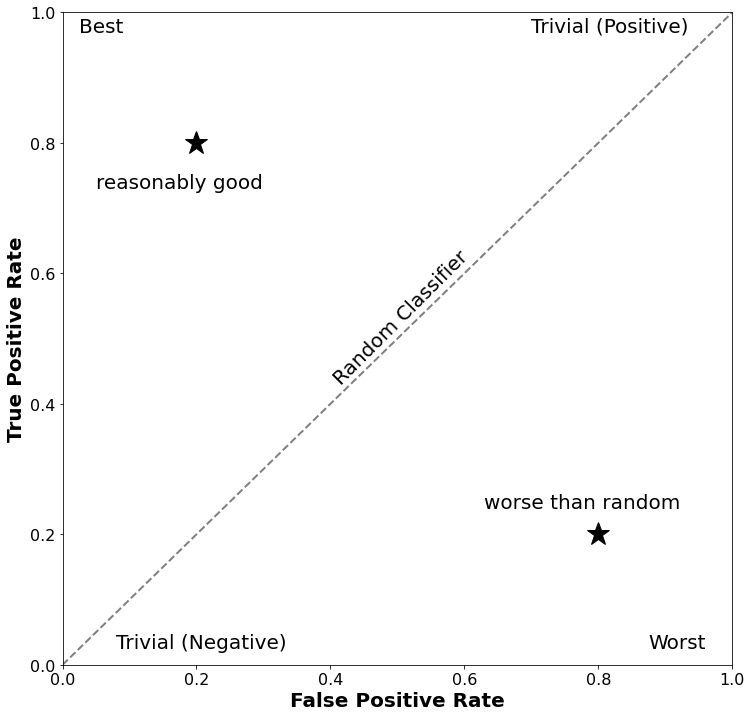

In [14]:
plt.figure(figsize=(12,12))
plt.plot(0.2,0.8, "k*", ms=24)
plt.plot(0.8,0.2, "k*", ms=24)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1], [0,1], ls="--", lw=2, color="gray")
plt.text(x=0.025, y=0.97, s="Best", font={"size":20})
plt.text(x=0.875, y=0.025, s="Worst", font={"size":20})
plt.text(x=0.08, y=0.025, s="Trivial (Negative)", font={"size":20})
plt.text(x=0.7, y=0.97, s="Trivial (Positive)", font={"size":20})
plt.xticks(font={"size":16})
plt.yticks(font={"size":16})
plt.ylabel("True Positive Rate", font={"size":20}, fontweight="bold")
plt.xlabel("False Positive Rate", font={"size":20}, fontweight="bold")
plt.text(x=0.05, y=0.73, s="reasonably good", font={"size":20})
plt.text(x=0.63, y=0.24, s="worse than random", font={"size":20})
plt.text(x=0.4, y=0.43, s="Random Classifier", font={"size":20}, rotation=45)
plt.savefig("./Figures/Table4-2.pdf",format="pdf",bbox_inches="tight")
plt.show()

#### An Example of an ROC Plot for Distinct Classifiers

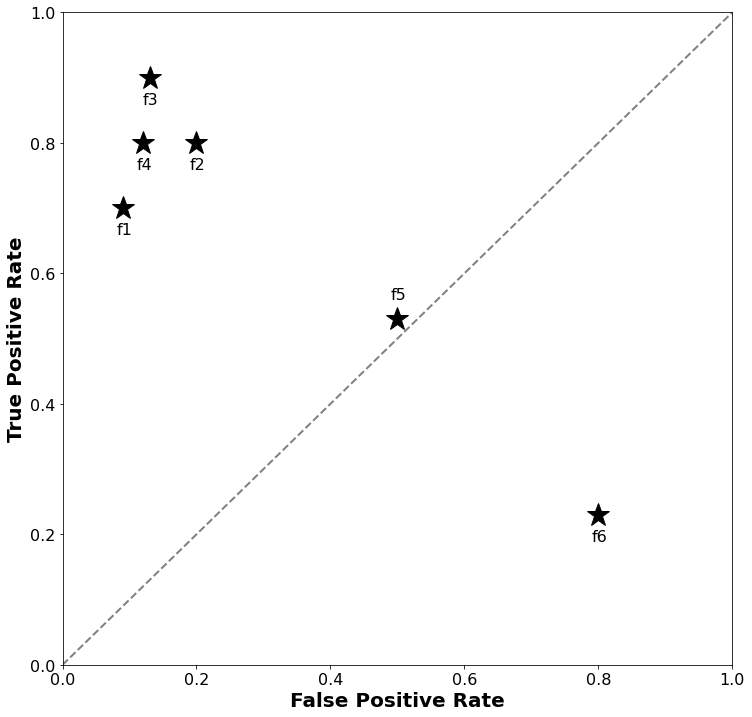

In [15]:
plt.figure(figsize=(12,12))
plt.plot(0.2,0.8, "k*", ms=24)
plt.text(x=0.19, y=0.76, s="f2", font = {"size":16})
plt.plot(0.13,0.9, "k*", ms=24)
plt.text(x=0.12, y=0.86, s="f3", font = {"size":16})
plt.plot(0.09,0.70, "k*", ms=24)
plt.text(x=0.08, y=0.66, s="f1", font = {"size":16})
plt.plot(0.12,0.8, "k*", ms=24)
plt.text(x=0.11, y=0.76, s="f4", font = {"size":16})
plt.plot(0.5,0.53, "k*", ms=24)
plt.text(x=0.49, y=0.56, s="f5", font = {"size":16})
plt.plot(0.8,0.23, "k*", ms=24)
plt.text(x=0.79, y=0.19, s="f6", font = {"size":16})

plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1], [0,1], ls="--", lw=2, color="gray")
plt.xticks(font={"size":16})
plt.yticks(font={"size":16})
plt.ylabel("True Positive Rate", font={"size":20}, fontweight="bold")
plt.xlabel("False Positive Rate", font={"size":20}, fontweight="bold")
plt.savefig("./Figures/Table4-3.pdf",format="pdf",bbox_inches="tight")
plt.show()

#### ROC Analysis for the Data of Table 5.11

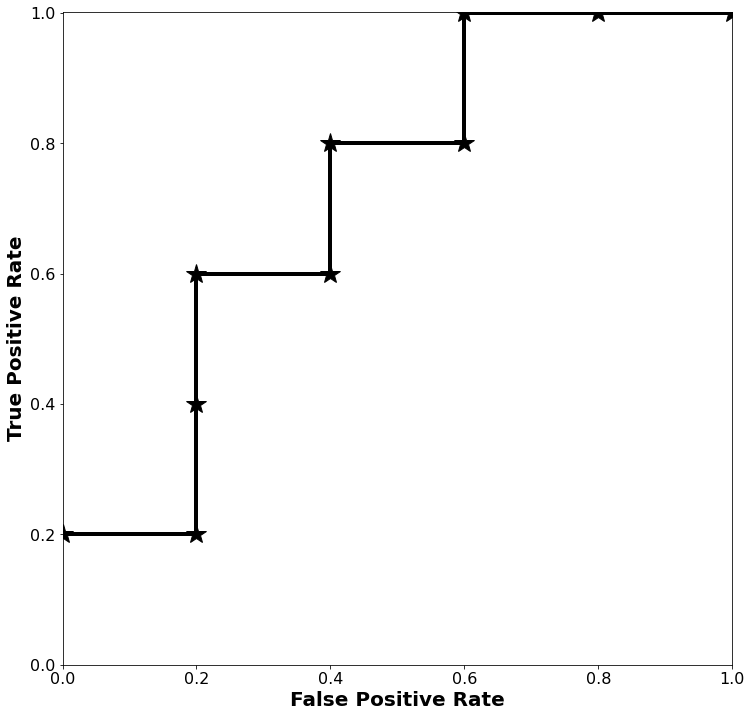

In [16]:
plt.figure(figsize=(12,12))
plt.xlim(0,1)
plt.ylim(0,1.001)
plt.xticks(font={"size":16})
plt.yticks(font={"size":16})
plt.ylabel("True Positive Rate", font={"size":20}, fontweight="bold")
plt.xlabel("False Positive Rate", font={"size":20}, fontweight="bold")
plt.plot([0,0.2,0.2,0.2, 0.4,0.4,0.6,0.6,0.8,1],
        [0.2,0.2,0.4,0.6,0.6,0.8,0.8,1,1,1], lw=4, marker="*", color="k", ls="", ms=20)
plt.plot([0,0.2,0.2,0.2, 0.4,0.4,0.6,0.6,0.8,1],
        [0.2,0.2,0.4,0.6,0.6,0.8,0.8,1,1,1], lw=4, marker="", color="k", ls="-", ms=20)
plt.savefig("./Figures/Table4-4.pdf",format="pdf",bbox_inches="tight")
plt.show()
